In [50]:
import logging
import os
import pathlib
import subprocess
import warnings
from glob import glob

import earthpy.appeears as etapp
import folium
import geopandas as gpd
import hvplot.pandas
import hvplot.xarray
import pandas as pd
import rioxarray as rxr
import xarray as xr

# Set up logging so AppeearsDownloader will log in notebook
logging.basicConfig(level=logging.INFO)

# Ignore FutureWarning coming from hvplot
warnings.simplefilter(action='ignore', category=FutureWarning)


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
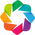

In [51]:
import geoviews as gv
import geoviews.feature as gf
from cartopy import crs

warnings.filterwarnings('ignore')

import numpy as np
import holoviews as hv

hv.extension('bokeh')

In [52]:
# creating path to project directory
project_dir = os.path.join(
    pathlib.Path.home(), 'earth-analytics', 'data', 'Waldo-fire2')

# create the project directory
os.makedirs(project_dir, exist_ok=True)
#project_dir

### 2012 Waldo Canyon Fire and Vegetation Recovery from NDVI Analysis
On June 23, 2012, the Waldo Canyon Fire ignited 4 miles northwest of Colorado Springs, CO. Strong erratic winds, abundant fuel, and extremely dry conditions in the region allowed for this fire to spread rapidly and intensify over the course of 18 days. This fire burned a total area of 18,247 acres in the Pikes Peak National Forest and Colorado Springs area. At the time, the Waldo Canyon Fire was the most destructive fire in Colorado history burning 346 homes, amassing 352.6 million dollars in damages, and killing 2 people. A BAER (Burned Area Emergency Response) team provided an assessment on the severity of the fire within the wildfire footprint, reporting 41% low/unburned, 40% moderate severity, and 19% high severity. 
Colorado Springs, CO is located within a dry-semi arid climatic region. Precipitation can be inconsistent in this region especially in the summer months as rainfall is driven by the setup of the North American Monsson. The 2012 summer was extreme in Colorado with record average temperatures set in Denver, with 27 days over 90° F. In this study, I investigate the use of satellite derived NDVI datasets to evaluate the recovery of vegetation following the 2012 Waldo Canyon Fire. 
### Aqua Satellite Mission and MODIS Instrument
On May 4th, 2002, NASA successfully launched the AQUA satellite mission. This mission was developed to collect high resolution datasets for the evaluation of changes in earth’s water cycle (evaporation, clouds, precipitation, soil moisture, sea ice, and land ice). The AQUA satellite mission was originally developed for a 6-year deployment, but remains active, and has continued collecting valuable datasets. The AQUA satellite is equipped with the MODIS (Moderate Resolution Imaging Spectroradiometer) instrument that collects data on vegetation Index products as well (NDVI and EVI). NDVI (Normalized Difference Vegetation Index) datasets are generated from the Near-infrared and red bands. The MODIS NDVI data sets used in this study are generated on 16 day and 1-month intervals at multiple spatial resolutions (250-meter, 500meter, 1 km, .05 degree). The Vegetation indices are generated from atmospheric-corrected reflectance in the red, near-infrared, and blue wavebands. The MODIS sensor has a built-in algorithms that remove low quality pixels through a compositing method. This allows researchers to quantify the abundance and presence of live green vegetation. This is especially useful for the analysis of areas impacted by forest fire. Datasets from pre and post fire can be used to evaluate the change in vegetation, quantify burn severity, and document recovery post fire.

Information from: 

https://modis.gsfc.nasa.gov/data/dataprod/mod13.php

https://aqua.nasa.gov/ 


In [53]:
# Download Boundary for fire
waldo_gdf = gpd.read_file("https://services3.arcgis.com/T4QMspbfLg3qTGWY"
                          "/arcgis/rest/services/Historic_Geomac_Perimet"
                          "ers_2012/FeatureServer/0/query?where=incident"
                          "name%20%3D%20'WALDO%20CANYON'%20AND%20latest"
                          "%20%3D%20'Y'&outFields=*&outSR=4326&f=json")
#waldo_gdf

In [54]:
# Colorado Springs location 
#from:https://www.latlong.net/place/colorado-springs-co-usa-1045.html
Colorado_sprngs_lat = 38.859055
Colorado_sprngs_lon = -104.813499
Colorado_sprngs_lat2 = 38.9
# Create a Folium map object
f=folium.Figure(width=1000,height=500)
waldo_map = folium.Map(location = [Colorado_sprngs_lat2, Colorado_sprngs_lon], 
                      zoom_start=10.5, scrollWheelZoom = False,
                      tiles = "https://server.arcgisonline.com/ArcGIS/"
                      "rest/services/NatGeo_World_Map/MapServer/tile/"
                      "{z}/{y}/{x}",
                      attr = "Tiles &copy; Esri &mdash; National Geogra"
                      "phic, Esri, DeLorme, NAVTEQ, UNEP-WCMC, USGS, "
                      "NASA, ESA, METI, NRCAN, GEBCO, NOAA, iPC").add_to(f)

# Convert the GeoDataFrame to GeoJSON format
waldo_geojson_data = waldo_gdf.to_json()


waldo_style= lambda feature: {"fillcolor": "#ffff00","color":"red"}

# Add the GeoJSON data to the map as a GeoJson layer
folium.GeoJson(waldo_geojson_data,waldo_style).add_to(waldo_map)

folium.Marker(location = [Colorado_sprngs_lat, Colorado_sprngs_lon]).add_to(waldo_map)

waldo_map

### Data Product Citation: 
Didan, K. (2021). MODIS/Aqua Vegetation Indices 16-Day L3 Global 250m SIN Grid V061. NASA EOSDIS Land Processes Distributed Active Archive Center. Accessed 2023-10-04 from https://doi.org/10.5067/MODIS/MYD13Q1.061. Accessed October 4, 2023.
### Software Citation: 
AppEEARS Team. (2023). Application for Extracting and Exploring Analysis Ready Samples (AppEEARS). Ver. 3.38. NASA EOSDIS Land Processes Distributed Active Archive Center (LP DAAC), USGS/Earth Resources Observation and Science (EROS) Center, Sioux Falls, South Dakota, USA. Accessed October 4, 2023. https://appeears.earthdatacloud.nasa.gov

In [55]:
# Initialize AppeearsDownloader for MODIS NDVI data
ndvi_downloader = etapp.AppeearsDownloader(
    download_key='modis-ndvi',
    ea_dir=project_dir,
    product='MYD13Q1.061',
    layer='_250m_16_days_NDVI',
    start_date='06-01',
    end_date='08-31',
    recurring=True,
    year_range=[2011, 2023],
    polygon=waldo_gdf
)

# Download files if the download directory does not exist
if not os.path.exists(ndvi_downloader.data_dir):
    ndvi_downloader.download_files()

#ndvi_downloader

In [56]:
ndvi_path_list = glob(
    os.path.join(ndvi_downloader.data_dir, "*", "*NDVI*.tif")
)
#ndvi_path_list

In [57]:
doy_start = -19
doy_end = -12
scale_factor = 10000

ndvi_da_list = []
for ndvi_path in ndvi_path_list:
    # Get date from file name
    doy = ndvi_path[doy_start:doy_end]
    date = pd.to_datetime(doy, format="%Y%j")

    # # Open dataset
    da = rxr.open_rasterio(ndvi_path, masked=True).squeeze()

    # # Prepare to concatenate: Add date dimension and clean up metadata
    da = da.assign_coords({"date": date})
    da = da.expand_dims({"date": 1})
    da.name = "NDVI"

    # Divide by scale factor
    da = da / scale_factor

    # Add the DataArray to the end of the accumulator list
    ndvi_da_list.append(da)

#ndvi_da_list

In [58]:
ndvi_ds = xr.combine_by_coords(ndvi_da_list, coords=["date"])
#ndvi_ds

In [59]:
# calculating mean ndvi 2013
ndvi_mean_2013 = ndvi_ds.sel(date = '2013').mean('date').NDVI
#print(ndvi_mean_2013)
# calculating mean ndvi 2011
ndvi_mean_2011 = ndvi_ds.sel(date = '2011').mean('date').NDVI
#print(ndvi_mean_2011)
#calculating difference between 2011- 2013
ndvi_diff_2013_2011 = ndvi_mean_2013 - ndvi_mean_2011
#print(ndvi_diff_2013_2011)

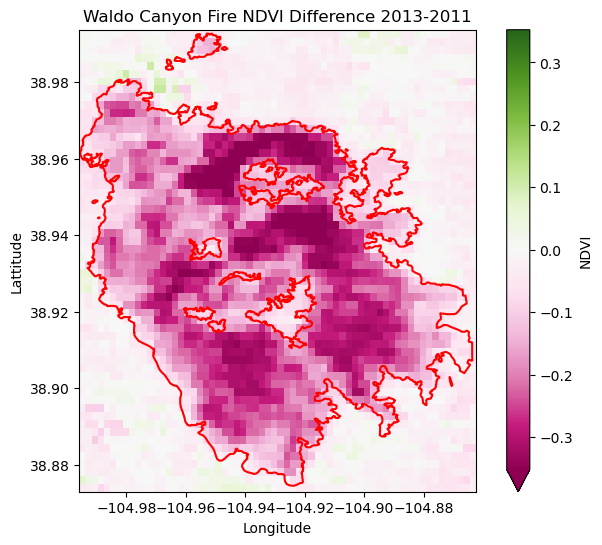

In [60]:
import matplotlib.pyplot as plt
# plotting with matplotlib
fig, ax = plt.subplots(figsize = (8,6))

ndvi_diff_2013_2011.plot(cmap = plt.cm.PiYG, robust = True, ax = ax)
ax.set_ylabel('Lattitude')
ax.set_xlabel('Longitude')
ax.set_title('Waldo Canyon Fire NDVI Difference 2013-2011')
waldo_gdf.boundary.plot(ax = ax, color = 'r')
plt.show()


In [61]:
# Envelope Camp Fire
out_gdf = gpd.GeoDataFrame(geometry=waldo_gdf.envelope).overlay(
    waldo_gdf, how="difference"
)
#out_gdf

In [62]:
# Clip Data Array to the boundaries for both inside and outside reservation
ndvi_fire_ds = ndvi_ds.rio.clip(waldo_gdf.geometry)
ndvi_out_ds = ndvi_ds.rio.clip(out_gdf.geometry)

In [63]:
ndvi_fire_df = (
    ndvi_fire_ds.groupby(ndvi_fire_ds.date.dt.year)
    .mean(...)
    .NDVI.to_dataframe()[["NDVI"]]
)
ndvi_out_df = (
    ndvi_out_ds.groupby(ndvi_out_ds.date.dt.year)
    .mean(...)
    .NDVI.to_dataframe()[["NDVI"]]
)
#(ndvi_fire_df, ndvi_out_df)

### Successional vegetation "post fire specialist" have been slow to repopulate the Waldo Canyon fire burn area 11 years post fire. 

<Axes: xlabel='year'>

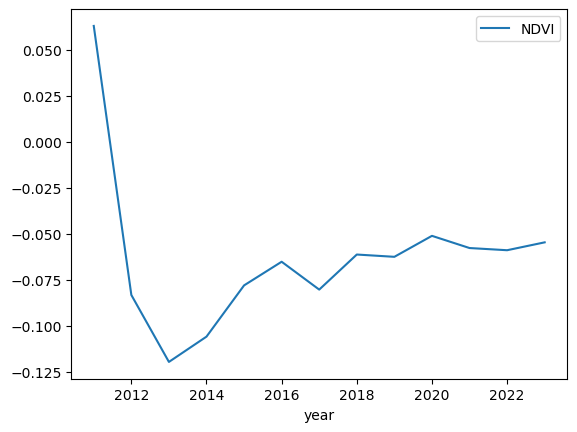

In [64]:
(ndvi_fire_df - ndvi_out_df).plot()

In [65]:
%%capture
%%bash
jupyter nbconvert waldo_2012.ipynb --to html --no-input
git config pull.rebase false